## Principal Component Analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
mat = loadmat("ex7data1.mat")
X = mat["X"]

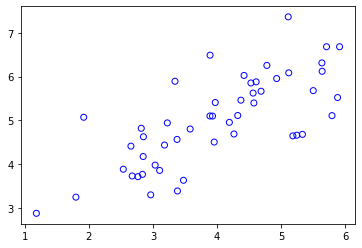

In [5]:
plt.scatter(X[:,0],X[:,1],marker="o",facecolors="none",edgecolors="b")

## Implementing PCA

In [8]:
def featureNormalize(X):
    """
    Returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.
    """
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    
    X_norm = (X - mu)/sigma
    
    return X_norm, mu , sigma


def pca(X):
    """
    Computes eigenvectors of the covariance matrix of X
    """
    m,n = X.shape[0], X.shape[1]
    
    sigma = 1/m * X.T @ X
    
    U,S,V = svd(sigma)
    
    return U,S,V

In [9]:

from numpy.linalg import svd
X_norm,mu,std = featureNormalize(X)
U,S = pca(X_norm)[:2]

## Visualizing PCA

(2, 8)

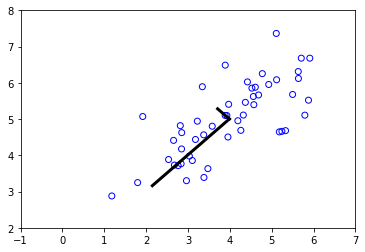

In [10]:
plt.scatter(X[:,0],X[:,1],marker="o",facecolors="none",edgecolors="b")
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)
plt.xlim(-1,7)
plt.ylim(2,8)

In [11]:
print("Top eigenvector U(:,1) =:",U[:,0])

Top eigenvector U(:,1) =: [-0.70710678 -0.70710678]


In [12]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only on to the top k eigenvectors
    """
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))
    
    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduced[:,j]
    
    return Z

In [13]:
# Project the data onto K=1 dimension
K=1
Z = projectData(X_norm, U, K)
print("Projection of the first example:",Z[0][0])

Projection of the first example: 1.4963126084578517


## Reconstructing an approximation of the data

In [14]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the projected data
    """
    m,n = Z.shape[0],U.shape[0]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]
    
    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T
    
    return X_rec

In [15]:
X_rec  = recoverData(Z, U, K)
print("Approximation of the first example:",X_rec[0,:])

Approximation of the first example: [-1.05805279 -1.05805279]


## Visualizing the projections

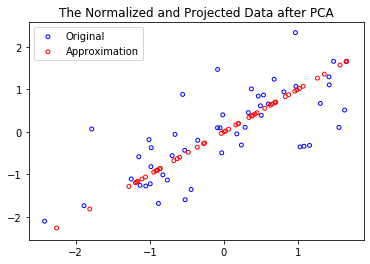

In [16]:
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=15)
plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",label="Approximation",facecolors="none",edgecolors="r",s=15)
plt.title("The Normalized and Projected Data after PCA")
plt.legend()

## Face Image Dataset

In [17]:
mat1 = loadmat("ex7faces.mat")
X1 = mat1["X"]

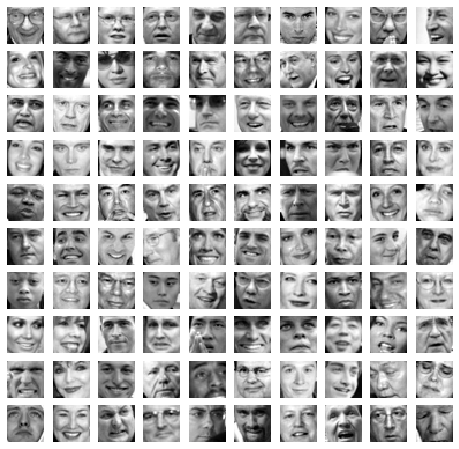

In [18]:
fig, ax = plt.subplots(nrows=10,ncols=10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax[int(i/10),j].imshow(X1[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")

## PCA on face

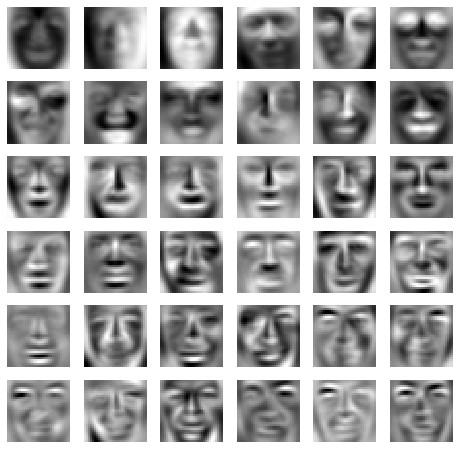

In [19]:
X_norm2 = featureNormalize(X1)[0]

# Run PCA
U2 =pca(X_norm2)[0]

#Visualize the top 36 eigenvectors found
U_reduced = U2[:,:36].T
fig2, ax2 = plt.subplots(6,6,figsize=(8,8))
for i in range(0,36,6):
    for j in range(6):
        ax2[int(i/6),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/6),j].axis("off")

In [20]:
K2 = 100
Z2 = projectData(X_norm2, U2, K2)
print("The projected data Z has a size of:",Z2.shape)

The projected data Z has a size of: (5000, 100)


## Data reconstruction

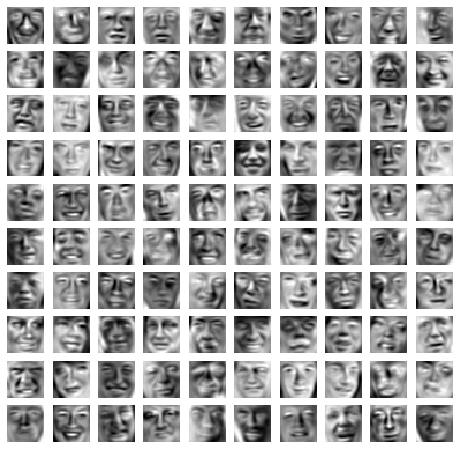

In [21]:
X_rec2  = recoverData(Z2, U2, K2)

# Visualize the reconstructed data
fig3, ax3 = plt.subplots(10,10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax3[int(i/10),j].imshow(X_rec2[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax3[int(i/10),j].axis("off")
